   # HOSPITAL PRICING CASE ANALYSIS

Problem statement: To build a linear regression model to predict the "Total cost to cospital" based on other variables

In [55]:
#importing required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_excel('D:/DSML/Assignment 2 dataset/IMB529-XLS-ENG.xlsx', sheet_name='MH-Modified Data')
df

,SL.,AGE,GEN,GENDER,MARITAL_STATUS,UNMARRIED,KEY COMPLAINTS_CODE,ACHD,CAD_DVD,CAD_SVD,...,ALERT,TYPE_OF_ADMSN,ELECTIVE,TOTAL_COST_TO_HOSPITAL,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_(Y/N),IMPLANT,COST_OF_IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,1,EMERGENCY,0,660293.0,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,1,EMERGENCY,0,809130.0,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,1,ELECTIVE,1,362231.0,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,1,EMERGENCY,0,629990.0,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,1,EMERGENCY,0,444876.0,24,12,12,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,1,ELECTIVE,1,295155.0,10,3,7,Y,1,35000
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,1,ELECTIVE,1,200321.0,11,2,9,Y,1,26000
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,1,ELECTIVE,1,191188.0,13,5,8,N,0,0
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,1,EMERGENCY,0,202807.0,9,6,3,N,0,0


Since the data is already encoded, lets drop the original column. Also serial no. column is also of no use, lets drop that also

In [57]:
#dropping irrelevant columns
df=df.drop('SL.',axis=1)
df=df.drop('GEN',axis=1)
df=df.drop('MARITAL_STATUS',axis=1)
df=df.drop('KEY COMPLAINTS_CODE',axis=1)
df=df.drop('PAST_MEDICAL_HISTORY_CODE',axis=1)
df=df.drop('MODE_OF_ARRIVAL',axis=1)
df=df.drop('STATE_AT_THE_TIME_OF_ARRIVAL',axis=1)
df=df.drop('TYPE_OF_ADMSN',axis=1)
df=df.drop('IMPLANT_USED_(Y/N)',axis=1)

In [58]:
#checking shape of dataframe
df.shape

(248, 41)

In [59]:
#Checking variables type
df.dtypes

AGE                       float64
GENDER                      int64
UNMARRIED                   int64
ACHD                        int64
CAD_DVD                     int64
CAD_SVD                     int64
CAD_TVD                     int64
CAD_VSD                     int64
OS_ASD                      int64
other_heart                 int64
other_respiratory           int64
other_general               int64
other_nervous               int64
other_tertalogy             int64
PM_VSD                      int64
RHD                         int64
BODY_WEIGHT               float64
BODY_HEIGHT                 int64
HR_PULSE                    int64
BP_HIGH                   float64
BP_LOW                    float64
RR                          int64
Diabetes1                   int64
Diabetes2                   int64
hypertension1               int64
hypertension2               int64
hypertension3               int64
other                       int64
HB                        float64
UREA          

In [60]:
#Finding proportion of missing values in entire data

#size and shape of the dataframe
print("Size of the dataframe:", df.size)
print("Shape of the dataframe:", df.shape)

#missing values in overall dataframe
print("Count of all missing values in dataframe", df.isnull().sum().sum())

#percentage of missing values in entire dataframe
print("Percentage of missing values in entire dataframe",  round((df.isnull().sum().sum()/df.size)*100,2),"%")

Size of the dataframe: 10168
Shape of the dataframe: (248, 41)
Count of all missing values in dataframe 94
Percentage of missing values in entire dataframe 0.92 %


In [61]:
#columns with missing values
df.isnull().sum()

AGE                        0
GENDER                     0
UNMARRIED                  0
ACHD                       0
CAD_DVD                    0
CAD_SVD                    0
CAD_TVD                    0
CAD_VSD                    0
OS_ASD                     0
other_heart                0
other_respiratory          0
other_general              0
other_nervous              0
other_tertalogy            0
PM_VSD                     0
RHD                        0
BODY_WEIGHT                0
BODY_HEIGHT                0
HR_PULSE                   0
BP_HIGH                   23
BP_LOW                    23
RR                         0
Diabetes1                  0
Diabetes2                  0
hypertension1              0
hypertension2              0
hypertension3              0
other                      0
HB                         2
UREA                      13
CREATININE                33
AMBULANCE                  0
TRANSFERRED                0
ALERT                      0
ELECTIVE      

We have 5 columns with null values, lets impute them with the mean of the respective columns

In [62]:
df['BP_HIGH'].fillna(df['BP_HIGH'].mean(), inplace=True)
df['BP_LOW'].fillna(df['BP_LOW'].mean(), inplace=True)
df['UREA'].fillna(df['UREA'].mean(), inplace=True)
df['CREATININE'].fillna(df['CREATININE'].mean(), inplace=True)
df['HB'].fillna(df['HB'].mean(), inplace=True)

In [63]:
df.isnull().sum()

AGE                       0
GENDER                    0
UNMARRIED                 0
ACHD                      0
CAD_DVD                   0
CAD_SVD                   0
CAD_TVD                   0
CAD_VSD                   0
OS_ASD                    0
other_heart               0
other_respiratory         0
other_general             0
other_nervous             0
other_tertalogy           0
PM_VSD                    0
RHD                       0
BODY_WEIGHT               0
BODY_HEIGHT               0
HR_PULSE                  0
BP_HIGH                   0
BP_LOW                    0
RR                        0
Diabetes1                 0
Diabetes2                 0
hypertension1             0
hypertension2             0
hypertension3             0
other                     0
HB                        0
UREA                      0
CREATININE                0
AMBULANCE                 0
TRANSFERRED               0
ALERT                     0
ELECTIVE                  0
TOTAL_COST_TO_HOSPIT

No null values in the dataset now

In [64]:
#Checking the descriptive statistics of non-categorical columns
columns=['AGE','BODY_WEIGHT','BODY_HEIGHT','HR_PULSE','BP_HIGH','BP_LOW','RR','HB','UREA','CREATININE','TOTAL_COST_TO_HOSPITAL','TOTAL_LENGTH_OF_STAY','LENGTH_OF_STAY_ICU','LENGTH_OF_STAY_WARD','COST_OF_IMPLANT']
df_cat=df[columns]
perc =[.01, .20, .40, .60, .80, .99]

df_cat.describe(percentiles=perc)

,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,TOTAL_COST_TO_HOSPITAL,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,COST_OF_IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,28.879837,37.524677,130.221774,92.229839,115.022222,71.875556,23.540323,12.894553,26.581702,0.746977,198723.330282,11.612903,3.475806,8.153226,8544.201613
std,25.899359,23.118822,39.170901,20.308740,21.461470,14.582797,3.840756,3.070729,15.571667,0.510678,122587.492984,5.392617,3.853520,3.755793,21521.877503
min,0.032877,2.020000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,46093.000000,3.000000,0.000000,0.000000,0.000000
1%,0.622500,3.958000,26.470000,58.000000,80.000000,40.000000,13.470000,7.794000,14.470000,0.300000,50315.230000,5.470000,0.470000,0.470000,0.000000
20%,4.400000,13.180000,87.400000,74.000000,100.000000,60.000000,20.000000,11.000000,17.000000,0.300000,123913.600000,8.000000,1.000000,6.000000,0.000000
40%,11.000000,23.400000,130.000000,84.800000,110.000000,70.000000,24.000000,11.900000,20.800000,0.600000,146186.280000,9.000000,2.000000,7.000000,0.000000
50%,15.500000,40.900000,147.500000,90.000000,111.000000,70.000000,24.000000,12.400000,23.000000,0.746977,162660.500000,10.000000,2.000000,7.000000,0.000000
60%,37.200000,47.200000,155.000000,98.000000,115.022222,71.900444,24.000000,13.000000,26.000000,0.746977,178159.600000,11.000000,3.000000,8.000000,0.000000
80%,58.600000,60.000000,163.000000,110.000000,130.000000,80.000000,26.000000,14.600000,32.000000,1.000000,251265.600000,15.000000,5.000000,10.000000,0.000000


In [65]:
#Checking outliers
df['z_score_TOTAL_COST_TO_HOSPITAL'] = zscore(df['TOTAL_COST_TO_HOSPITAL'] )
df[ ( df.z_score_TOTAL_COST_TO_HOSPITAL > 3.0) | ( df.z_score_TOTAL_COST_TO_HOSPITAL < -3.0) ]

,AGE,GENDER,UNMARRIED,ACHD,CAD_DVD,CAD_SVD,CAD_TVD,CAD_VSD,OS_ASD,other_heart,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL_COST_TO_HOSPITAL,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT,COST_OF_IMPLANT,z_score_TOTAL_COST_TO_HOSPITAL
0,58.0,0,0,0,0,0,0,0,0,1,...,0,1,0,660293.0,25,12,13,1,38000,3.772841
1,59.0,0,0,0,1,0,0,0,0,0,...,0,1,0,809130.0,41,20,21,1,39690,4.989425
3,46.0,0,0,0,1,0,0,0,0,0,...,0,1,0,629990.0,14,13,1,1,89450,3.525146
6,73.0,0,0,0,0,0,1,0,0,0,...,0,1,1,887350.0,15,15,0,0,0,5.628790
12,40.0,0,0,0,0,0,0,0,0,0,...,0,1,1,711616.0,17,10,7,1,196848,4.192352


In [66]:
#removing outliers
df = df.drop([0,1,3,6,12])
df = df.drop(['z_score_TOTAL_COST_TO_HOSPITAL'],axis=1)
df.reset_index()
df.shape 

(243, 41)

In [67]:
columns = ['AGE','BODY_WEIGHT','BODY_HEIGHT','HR_PULSE','BP_HIGH','BP_LOW','RR','HB','UREA','CREATININE','TOTAL_LENGTH_OF_STAY','LENGTH_OF_STAY_ICU','LENGTH_OF_STAY_WARD','COST_OF_IMPLANT']
df_new=df[columns]

In [68]:
def get_vif_factors( df_new ):
    X_matrix = np.asmatrix(df_new)
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = df_new.columns
    vif_factors['vif'] = vif
    return vif_factors

In [69]:
#Handling multicollinearity
vif_df  = df_new[columns]
vif_df.head()

,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,COST_OF_IMPLANT
2,82.0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,18,9,9,0
4,60.0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,24,12,12,0
5,75.0,45.0,140,130,215.0,140.0,42,11.8,29.0,1.0,31,9,22,0
7,71.0,43.8,164,60,130.0,90.0,22,10.1,37.0,1.5,24,11,13,0
8,72.0,72.0,174,95,100.0,50.0,25,9.6,32.0,1.2,26,9,17,0


In [70]:
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
10,TOTAL_LENGTH_OF_STAY,4112.179306
12,LENGTH_OF_STAY_WARD,2078.324492
11,LENGTH_OF_STAY_ICU,613.165231
4,BP_HIGH,91.196100
5,BP_LOW,66.237679
6,RR,41.092381
2,BODY_HEIGHT,38.515885
3,HR_PULSE,30.682723
1,BODY_WEIGHT,26.417197
7,HB,17.652977


In [71]:
#dropping total length of stay and recalculating vif
vif_df = vif_df.drop('TOTAL_LENGTH_OF_STAY',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
4,BP_HIGH,90.028365
5,BP_LOW,66.122180
6,RR,41.077894
2,BODY_HEIGHT,38.504403
3,HR_PULSE,30.644264
1,BODY_WEIGHT,26.136336
7,HB,17.635474
0,AGE,9.970788
11,LENGTH_OF_STAY_WARD,6.714801
9,CREATININE,5.982109


In [72]:
#dropping BP_high and recalculating vif
vif_df = vif_df.drop('BP_HIGH',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
5,RR,39.238091
2,BODY_HEIGHT,38.369085
4,BP_LOW,31.218390
3,HR_PULSE,30.084896
1,BODY_WEIGHT,25.997510
6,HB,17.627966
0,AGE,9.773697
10,LENGTH_OF_STAY_WARD,6.708686
8,CREATININE,5.706406
7,UREA,5.409608


In [73]:
#dropping RR and recalculating vif
vif_df = vif_df.drop('RR',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
2,BODY_HEIGHT,37.261429
4,BP_LOW,29.064176
1,BODY_WEIGHT,25.991214
3,HR_PULSE,21.520101
5,HB,17.337503
0,AGE,9.603550
9,LENGTH_OF_STAY_WARD,6.497680
7,CREATININE,5.706371
6,UREA,5.361077
8,LENGTH_OF_STAY_ICU,2.220069


In [74]:
#dropping BODY_HEIGHT and recalculating vif
vif_df = vif_df.drop('BODY_HEIGHT',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
3,BP_LOW,28.353978
2,HR_PULSE,20.055597
1,BODY_WEIGHT,16.362388
4,HB,16.348970
0,AGE,9.588216
8,LENGTH_OF_STAY_WARD,6.494948
6,CREATININE,5.614500
5,UREA,5.358373
7,LENGTH_OF_STAY_ICU,2.188315
9,COST_OF_IMPLANT,1.323597


In [75]:
#dropping BP_LOW and recalculating vif
vif_df = vif_df.drop('BP_LOW',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
3,HB,14.716419
2,HR_PULSE,14.251793
1,BODY_WEIGHT,14.188184
0,AGE,9.511815
7,LENGTH_OF_STAY_WARD,6.469829
5,CREATININE,5.614419
4,UREA,5.357305
6,LENGTH_OF_STAY_ICU,2.182934
8,COST_OF_IMPLANT,1.323545


In [76]:
#dropping HB and recalculating vif
vif_df = vif_df.drop('HB',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
1,BODY_WEIGHT,12.422848
0,AGE,9.286666
2,HR_PULSE,8.617872
6,LENGTH_OF_STAY_WARD,6.050603
4,CREATININE,5.607322
3,UREA,5.328241
5,LENGTH_OF_STAY_ICU,2.176448
7,COST_OF_IMPLANT,1.308478


In [77]:
#dropping BODY_WEIGHT and recalculating vif
vif_df = vif_df.drop('BODY_WEIGHT',axis=1)
vif_factors = get_vif_factors( vif_df )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,columns,vif
1,HR_PULSE,7.688469
5,LENGTH_OF_STAY_WARD,6.042111
2,UREA,5.308351
3,CREATININE,5.304574
0,AGE,3.484541
4,LENGTH_OF_STAY_ICU,2.141388
6,COST_OF_IMPLANT,1.270398


Features total length of stay, bp high, rr, body weight, bp low, hb and body height shall be excluded from list of IVs on the basis of VIF > 10 indicating heavy multicollinearity

In [78]:
df=df.drop('TOTAL_LENGTH_OF_STAY',axis=1)
df=df.drop('BP_HIGH',axis=1)
df=df.drop('RR',axis=1)
df=df.drop('BODY_WEIGHT',axis=1)
df=df.drop('BP_LOW',axis=1)
df=df.drop('HB',axis=1)
df=df.drop('BODY_HEIGHT',axis=1)

In [79]:
df.columns

Index(['AGE', 'GENDER', 'UNMARRIED', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'HR_PULSE', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE', 'TOTAL_COST_TO_HOSPITAL',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT',
       'COST_OF_IMPLANT'],
      dtype='object')

## Splitting data into training and testing

In [80]:
# Segregate the features and outcome variable in the dataset
X = df[['AGE','GENDER','UNMARRIED','ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'HR_PULSE', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT',
       'COST_OF_IMPLANT']]
X = sm.add_constant( X[X.columns] )
Y = df['TOTAL_COST_TO_HOSPITAL']
Y.mean()

187592.62102880658

In [81]:
# Splitting dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split( X[X.columns], Y, test_size=0.3, random_state = 87)
print("Train Data:",len( X_train ))
print("Test  Data:",len( X_test ))

Train Data: 170
Test  Data: 73


In [82]:
# Building Linear Regression model with train dataset
model_1 = sm.OLS( y_train, X_train ).fit()

In [83]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS                      Adj. R-squared:       0.867     
Dependent Variable:     TOTAL_COST_TO_HOSPITAL   AIC:                  4033.9895 
Date:                   2024-08-18 22:26         BIC:                  4131.1992 
No. Observations:       170                      Log-Likelihood:       -1986.0   
Df Model:               30                       F-statistic:          37.84     
Df Residuals:           139                      Prob (F-statistic):   7.84e-53  
R-squared:              0.891                    Scale:                1.0048e+09
---------------------------------------------------------------------------------
                       Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
const               -11987.2766 16115.3249 -0.7438 0.4582  -43850.1380 19875.5847
AGE                    325.5798   260.9818  1.2475 0.2143    -190.4275   841.5871
GENDER                3840.1933  5955.6418  0.6448 0.5201   -7935.1689 15615.5556
UNMARRIED            10822.8882 11459.5004  0.9444 0.3466  -11834.5807 33480.3571
ACHD                  8891.9962 12745.6189  0.6977 0.4866  -16308.3577 34092.3500
CAD_DVD              38785.8849 11538.2261  3.3615 0.0010   15972.7613 61599.0086
CAD_SVD             -32957.4565 35531.1748 -0.9276 0.3552 -103208.9037 37293.9908
CAD_TVD              38277.9463 12289.1908  3.1148 0.0022   13980.0320 62575.8607
CAD_VSD                 -0.0000     0.0000 -1.5206 0.1306      -0.0000     0.0000
OS_ASD                5760.5225 13879.8788  0.4150 0.6788  -21682.4646 33203.5097
other_heart          -1308.5682 10898.0974 -0.1201 0.9046  -22856.0436 20238.9071
other_respiratory     9225.3572 13679.3895  0.6744 0.5012  -17821.2270 36271.9414
other_general           -0.0000     0.0000 -0.2672 0.7897      -0.0000     0.0000
other_nervous       -30237.8758 33639.9746 -0.8989 0.3703  -96750.0842 36274.3326
other_tertalogy      31837.8310 13142.3401  2.4225 0.0167    5853.0890 57822.5730
PM_VSD               25279.5270 17999.0218  1.4045 0.1624  -10307.7380 60866.7920
RHD                   6212.5173 16211.1458  0.3832 0.7021  -25839.7992 38264.8337
HR_PULSE               173.4244   173.8670  0.9975 0.3203    -170.3416   517.1904
Diabetes1           -15654.5577 14518.4237 -1.0783 0.2828  -44360.0616 13050.9463
Diabetes2            28613.5147 15282.9700  1.8722 0.0633   -1603.6332 58830.6626
hypertension1        -6533.2038 11412.5546 -0.5725 0.5679  -29097.8525 16031.4449
hypertension2       -17279.7265 11500.5782 -1.5025 0.1352  -40018.4134  5458.9604
hypertension3        19156.8089 18267.2403  1.0487 0.2961  -16960.7717 55274.3894
other               -17400.1022 11593.1193 -1.5009 0.1356  -40321.7594  5521.5550
UREA                  -275.8282   252.0512 -1.0943 0.2757    -774.1781   222.5217
CREATININE           26285.6474 10701.2650  2.4563 0.0153    5127.3446 47443.9503
AMBULANCE            29159.0103 25214.3357  1.1564 0.2495  -20694.2126 79012.2331
TRANSFERRED          -5129.0492 21181.0986 -0.2422 0.8090  -47007.8455 36749.7471
ALERT               -11987.2766 16115.3249 -0.7438 0.4582  -43850.1380 19875.5847
ELECTIVE             33430.0391 24938.6956  1.3405 0.1823  -15878.1944 82738.2726
LENGTH_OF_STAY_ICU   18168.0703   909.9679 19.9656 0.0000   16368.9022 19967.2385
LENGTH_OF_STAY_WARD   5757.7002   771.7655  7.4604 0.0000    4231.7827  7283.6178
IMPLANT              21569.1383 15497.8666  1.3917 0.1662   -9072.8985 52211.1750
COST_OF_IMPLANT          1.4106     0.3278  4.3032 0.0000       0.7625     2.0587
---------------------------------------------------------------------------------
Omnibus:               17.026         Durbin-Watson:            2.048            
Prob(Omnibus):         0.000          Ja

#Extracting significant features

Look for pvalues < 0.05 in model object

In [84]:
significant_vars = model_1.pvalues.where(model_1.pvalues < 0.05).dropna()
significant_vars 

CAD_DVD                1.001291e-03
CAD_TVD                2.236341e-03
other_tertalogy        1.670013e-02
CREATININE             1.526986e-02
LENGTH_OF_STAY_ICU     1.160640e-42
LENGTH_OF_STAY_WARD    8.496733e-12
COST_OF_IMPLANT        3.154783e-05
dtype: float64

In [85]:
#Rebuilding the model after removing insignificant features
significant_vars = ['const','CAD_DVD','CAD_TVD','other_tertalogy','CREATININE','LENGTH_OF_STAY_ICU','LENGTH_OF_STAY_WARD','COST_OF_IMPLANT']

X1_train = X_train[significant_vars]
X1_test  = X_test[significant_vars]
y1_train = y_train 
y1_test  = y_test

print("Rows Train X1:", len(X1_train.index), "Columns Train X1:", len(X1_train.columns))
print("Rows Test X1:", len(X1_test.index), "Columns Test X1:", len(X1_test.columns))
print("Length Train y1:", len(y1_train))
print("Length Test y1:", len(y1_train))

Rows Train X1: 170 Columns Train X1: 8
Rows Test X1: 73 Columns Test X1: 8
Length Train y1: 170
Length Test y1: 170


In [86]:
#regenearte model
model_2 = sm.OLS(y1_train, X1_train).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                OLS                     Adj. R-squared:      0.862     
Dependent Variable:   TOTAL_COST_TO_HOSPITAL  AIC:                 4020.7442 
Date:                 2024-08-18 22:26        BIC:                 4045.8306 
No. Observations:     170                     Log-Likelihood:      -2002.4   
Df Model:             7                       F-statistic:         151.8     
Df Residuals:         162                     Prob (F-statistic):  9.06e-68  
R-squared:            0.868                   Scale:               1.0454e+09
-----------------------------------------------------------------------------
                      Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------------
const               41589.4487 7673.1517  5.4201 0.0000 26437.1549 56741.7426
CAD_DVD             34425.5946 8633.5142  3.9874 0.0001 17376.8579 51474.3313
CAD_TVD             36365.9359 8674.9603  4.1921 0.0000 19235.3548 53496.5170
other_tertalogy     26886.8908 9636.5268  2.7901 0.0059  7857.4893 45916.2924
CREATININE          19371.9053 6404.8298  3.0246 0.0029  6724.1867 32019.6239
LENGTH_OF_STAY_ICU  18749.7628  801.9072 23.3815 0.0000 17166.2239 20333.3016
LENGTH_OF_STAY_WARD  5538.1928  699.4039  7.9184 0.0000  4157.0689  6919.3166
COST_OF_IMPLANT         1.8617    0.1550 12.0112 0.0000     1.5557     2.1678
-----------------------------------------------------------------------------
Omnibus:                  13.823           Durbin-Watson:              2.104 
Prob(Omnibus):            0.001            Jarque-Bera (JB):           23.842
Skew:                     0.405            Prob(JB):                   0.000 
Kurtosis:                 4.646            Condition No.:              75270 
=============================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [87]:
def get_train_test_rmse( model_2, X1_train, y1_train, X1_test, y1_test):
    y1_train_pred = model_2.predict( X1_train )
    rmse_train = round(metrics.mean_squared_error( y1_train, y1_train_pred, squared=False), 3)
    r2_train = metrics.r2_score( y1_train, y1_train_pred )
    CI_train   = stats.norm.interval(0.95,loc = y1_train.mean(),scale = y1_train.std())
        
    y1_test_pred = model_2.predict( X1_test )
    rmse_test = round(metrics.mean_squared_error( y1_test, y1_test_pred, squared=False), 3)
    r2_test = metrics.r2_score( y1_test, y1_test_pred )
    CI_test   = stats.norm.interval(0.95,loc = y1_test_pred.mean(),scale = y1_test_pred.std())
        
    print( "mean_train:", round(y1_train.mean(),3), "mean_test:", round(y1_test.mean(),3))
    print( "mean_pred_train:", round(y1_train_pred.mean(),3), "mean_pred_test:", round(y1_test_pred.mean(),3))
    print( "rmse_train: ", rmse_train, " rmse_test:", rmse_test )
    print( "R Squared Train: ", np.round(r2_train,3), "R Squared Test: ", np.round(r2_test,3))
    print( "CI_train_range:", round((CI_train[1]-CI_train[0]),3), "CI_test_range:", round((CI_test[1]-CI_test[0]),3))
    print( "diff_CI_range:", round(abs(CI_train[1]- CI_train[0] - CI_test[1] + CI_test[0]),3)) 

In [88]:
# Performance of linear regression model
get_train_test_rmse( model_2, X1_train, y1_train, X1_test, y1_test  )

mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 190330.796
rmse_train:  31562.372  rmse_test: 39176.476
R Squared Train:  0.868 R Squared Test:  0.872
CI_train_range: 341202.175 CI_test_range: 366372.917
diff_CI_range: 25170.742


### Applying ridge regression

In [89]:
# Constant neednot be added separately for these functions. So let us drop the constant from X_train and X_test
X_train = X_train.drop(['const'], axis=1)
X_test  = X_test.drop(['const'], axis=1)

In [90]:
#Ridge regression
# Applying alpha = 25 and running the algorithms for maximum of 500 iterations
ridge = Ridge(alpha = 100, max_iter = 500) 
# alpha = 0 tends to linear regression and higher alpha leads to higher penalty
ridge.fit( X_train, y_train )

Ridge(alpha=100, max_iter=500)

In [91]:
ridge.intercept_

33542.81690987127

In [92]:
ridge.coef_

array([ 4.99317845e+02, -1.41846178e+03,  1.31840704e+02, -1.28787649e+03,
        2.67232662e+03, -5.75932615e+02,  3.23498757e+03,  0.00000000e+00,
       -3.12213814e+02, -3.46438395e+03, -5.66348330e+01,  0.00000000e+00,
       -4.03438940e+02,  2.31002182e+03,  4.90070279e+02,  1.14689920e+02,
        2.13437309e+02, -5.53553718e+02,  3.48278542e+03, -6.77689998e+02,
       -1.29364911e+03,  3.03860478e+02, -1.10226082e+03,  8.65714634e+01,
        3.44207965e+03,  9.88324789e+02, -4.06251618e+02,  0.00000000e+00,
       -6.56011969e+02,  1.83756546e+04,  5.14880474e+03,  8.75830907e+02,
        1.67721521e+00])

In [93]:
# Store the coefficients in a dataframe
columns_coef_df = pd.DataFrame( { 'columns': ['const','AGE','GENDER','UNMARRIED','ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'HR_PULSE', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT',
       'COST_OF_IMPLANT'], 'coef': [ridge.intercept_]+(ridge.coef_).tolist() } )

# Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values( 'coef', ascending=False)

sorted_coef_vals

,columns,coef
0,const,33542.816910
30,LENGTH_OF_STAY_ICU,18375.654558
31,LENGTH_OF_STAY_WARD,5148.804744
19,Diabetes2,3482.785419
25,CREATININE,3442.079653
7,CAD_TVD,3234.987570
5,CAD_DVD,2672.326617
14,other_tertalogy,2310.021817
26,AMBULANCE,988.324789
32,IMPLANT,875.830907


Text(0, 0.5, 'Features')

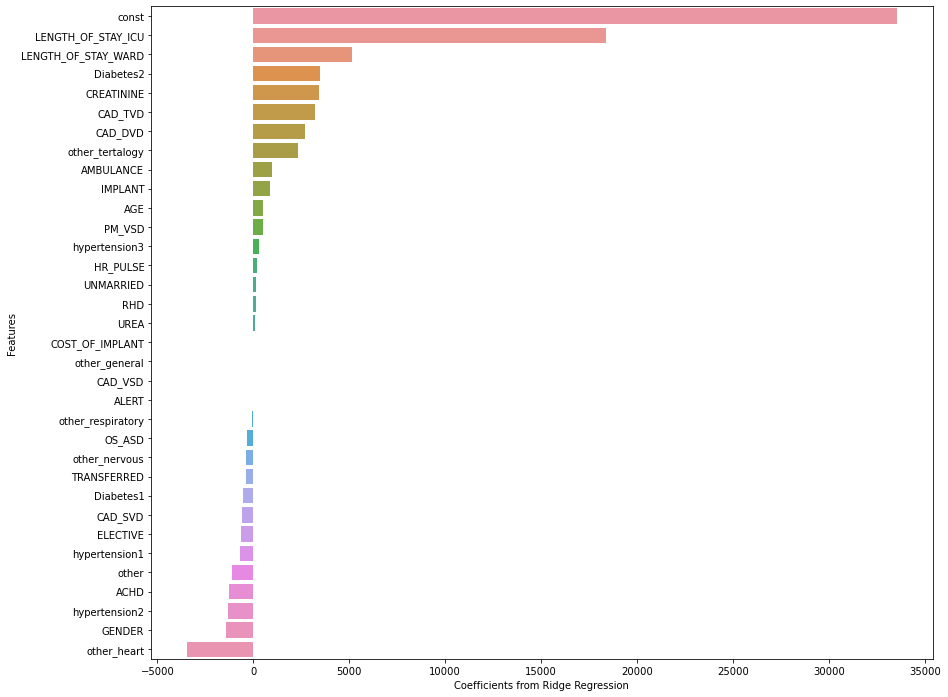

In [94]:
# Plotting the coefficient values
plt.figure( figsize = ( 14,12 ))

## Creating a bar plot
sn.barplot(x="coef", y="columns", data=sorted_coef_vals);
plt.xlabel("Coefficients from Ridge Regression")
plt.ylabel("Features")

In [95]:
# Performance of Ridge regression model
get_train_test_rmse( ridge, X_train, y_train, X_test, y_test  )

mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 192411.26
rmse_train:  33753.958  rmse_test: 41590.613
R Squared Train:  0.849 R Squared Test:  0.856
CI_train_range: 341202.175 CI_test_range: 350469.779
diff_CI_range: 9267.605


### Applying lasso regression

In [96]:
# Applying alpha = 5 and running the algorithms for maximum of 500 iterations
lasso = Lasso(alpha = 5, max_iter = 500)
lasso.fit( X_train, y_train )

Lasso(alpha=5, max_iter=500)

In [97]:
# Store the coefficients in a dataframe
columns_coef_df = pd.DataFrame( { 'columns': ['const','AGE','GENDER','UNMARRIED','ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'HR_PULSE', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT',
       'COST_OF_IMPLANT'], 'coef': [lasso.intercept_]+(lasso.coef_).tolist() } )

# Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values( 'coef', ascending=False)
sorted_coef_vals

,columns,coef
5,CAD_DVD,38464.992317
7,CAD_TVD,37914.982505
29,ELECTIVE,32278.526866
14,other_tertalogy,31433.389099
19,Diabetes2,28708.620702
26,AMBULANCE,28101.923285
25,CREATININE,26063.571861
15,PM_VSD,24705.958978
32,IMPLANT,21485.623815
22,hypertension3,18970.439595


Text(0, 0.5, 'Features')

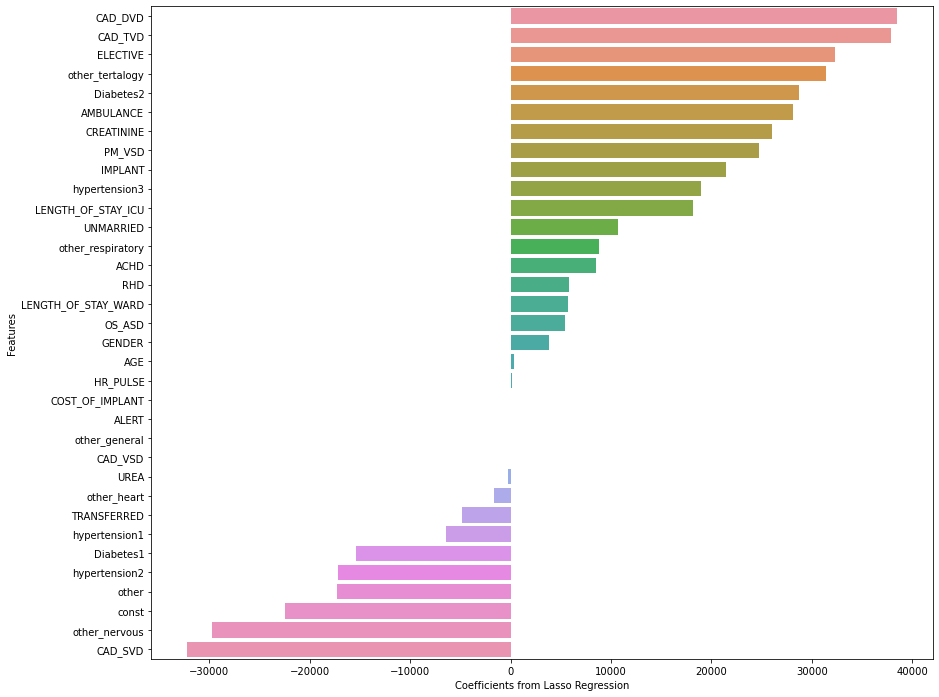

In [98]:
# Plotting the coefficient values
plt.figure( figsize = ( 14,12 ))

## Creating a bar plot
sn.barplot(x="coef", y="columns", data=sorted_coef_vals);
plt.xlabel("Coefficients from Lasso Regression")
plt.ylabel("Features")

In [99]:
# Performance of Lasso regression model
get_train_test_rmse( lasso, X_train, y_train, X_test, y_test  )

mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 188106.304
rmse_train:  28664.3  rmse_test: 41086.097
R Squared Train:  0.891 R Squared Test:  0.859
CI_train_range: 341202.175 CI_test_range: 369417.036
diff_CI_range: 28214.861


### Applying elnet regression

In [100]:
enet = ElasticNet(alpha = 10, l1_ratio = 0.2, max_iter = 500)  #l1_ratio: 0<l1_ration<1
enet.fit( X_train, y_train )

ElasticNet(alpha=10, l1_ratio=0.2, max_iter=500)

In [101]:
# Store the coefficients in a dataframe

columns_coef_df = pd.DataFrame( { 'columns': ['const','AGE','GENDER','UNMARRIED','ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'HR_PULSE', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT',
       'COST_OF_IMPLANT'], 'coef': [enet.intercept_]+(enet.coef_).tolist() } )

# Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values( 'coef', ascending=False)

sorted_coef_vals

,columns,coef
0,const,27041.027030
30,LENGTH_OF_STAY_ICU,10666.547466
31,LENGTH_OF_STAY_WARD,2464.352755
1,AGE,1001.348693
17,HR_PULSE,563.847089
5,CAD_DVD,428.082818
19,Diabetes2,427.420964
24,UREA,390.502138
25,CREATININE,367.260912
7,CAD_TVD,363.111496


Text(0, 0.5, 'Features')

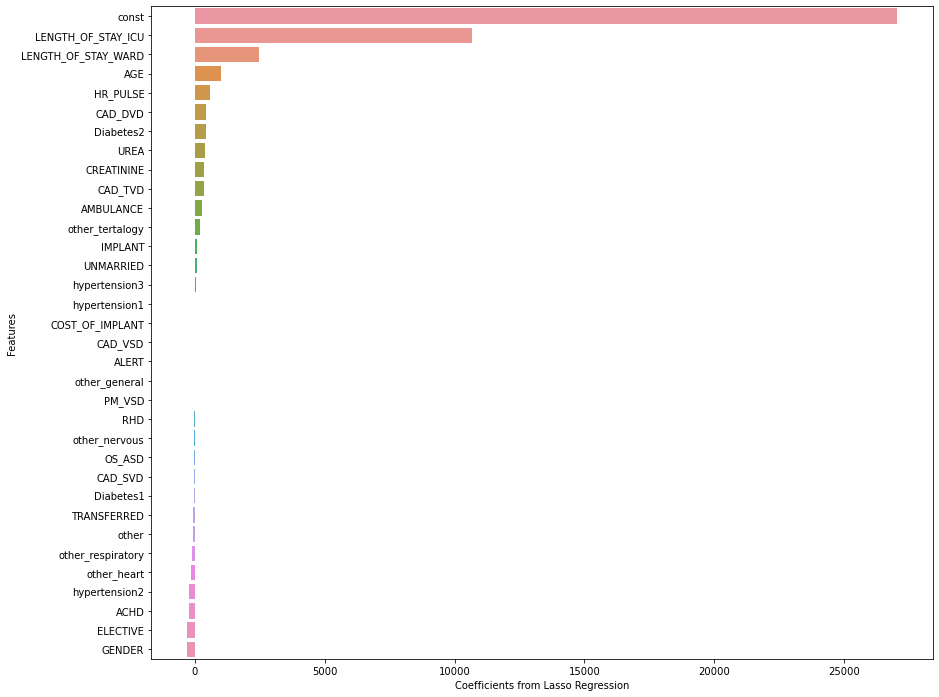

In [102]:
# Plotting the coefficient values
plt.figure( figsize = ( 14,12))

## Creating a bar plot
sn.barplot(x="coef", y="columns", data=sorted_coef_vals);
plt.xlabel("Coefficients from Lasso Regression")
plt.ylabel("Features")

In [103]:
# Performance of elnet regression model
get_train_test_rmse( enet, X_train, y_train, X_test, y_test  )

mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 187478.402
rmse_train:  44993.715  rmse_test: 60648.988
R Squared Train:  0.731 R Squared Test:  0.693
CI_train_range: 341202.175 CI_test_range: 261984.683
diff_CI_range: 79217.491


#### Comparing performances

In [104]:
print("Benchmark: Linear Regression Performance")
get_train_test_rmse( model_2, X1_train, y1_train, X1_test, y1_test  )
print("")

print("Ridge Performance")
get_train_test_rmse( ridge, X_train, y_train, X_test, y_test  )
print("")

print("Lasso Performance")
get_train_test_rmse( lasso, X_train, y_train, X_test, y_test  )
print("")

print("Elnet Performance")
get_train_test_rmse( enet, X_train, y_train, X_test, y_test  )
print("")

Benchmark: Linear Regression Performance
mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 190330.796
rmse_train:  31562.372  rmse_test: 39176.476
R Squared Train:  0.868 R Squared Test:  0.872
CI_train_range: 341202.175 CI_test_range: 366372.917
diff_CI_range: 25170.742

Ridge Performance
mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 192411.26
rmse_train:  33753.958  rmse_test: 41590.613
R Squared Train:  0.849 R Squared Test:  0.856
CI_train_range: 341202.175 CI_test_range: 350469.779
diff_CI_range: 9267.605

Lasso Performance
mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 188106.304
rmse_train:  28664.3  rmse_test: 41086.097
R Squared Train:  0.891 R Squared Test:  0.859
CI_train_range: 341202.175 CI_test_range: 369417.036
diff_CI_range: 28214.861

Elnet Performance
mean_train: 181991.746 mean_test: 200635.755
mean_pred_train: 181991.746 mean_pred_test: 187478.

Linear Regression has the best overall performance based on RMSE scores. The RMSE values are the lowest on both the training (31,562.372) and test (39,176.476) sets, indicating that this approach minimizes prediction errors the most effectively.

### Learnings

Linear Regression: This approach provided the best balance between model complexity and predictive accuracy, as indicated by the lowest RMSE values for both training and test data. It is a strong baseline model for this dataset.


Ridge Regression: Ridge Regression added some regularization to the model, which slightly increased the RMSE on both training and test sets compared to Linear Regression. It did not significantly improve model performance, but it is useful for reducing overfitting in cases with highly correlated features.


Lasso Regression: Lasso Regression performed well on the training set, achieving the lowest RMSE (28,664.3). However, it did not generalize as well to the test set, with a higher RMSE than Linear Regression. Lasso is particularly effective when you suspect that only a few features are driving the response variable, as it performs feature selection by driving some coefficients to zero.


Elastic Net (Elnet): Elastic Net, which combines Ridge and Lasso regularization, performed the worst among all the models, with the highest RMSE on both training (44,993.715) and test (60,648.988) sets. This suggests that this model struggled with this particular dataset, likely due to the balance between regularization effects.


1. Linear Regression is used for simple datasets, however with increasing complexity of data set the biasness and variances increases, and in order to remove we have 3 other approaches: Lasso, Ridge, and Elnet <br>
2. For the other three approcahes, we need to use trial and error to find the best penalty factor for the model <br>
3. Penalty factor is calculated by the model and is known as regularization <br>
4. Each approcah has its own advantages, so it is important to test through multiple approcahes to find the correct model